In [100]:
#Import Stuff
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as ss
import math
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, log_loss, confusion_matrix, precision_score, recall_score
from sklearn import feature_selection
import statsmodels.api as sm
import statsmodels.formula.api as sm2

In [44]:
def convert_prob_to_label(prob, cutoff = 0.5):
    label = []
    for i in range(len(prob)):
        if prob[i] > cutoff:
            label.append(1)
        else:
            label.append(0)
    return label

In [45]:
#Credit Data
dfCred = pd.read_csv("credit_risk_dataset.csv")
dfCred.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [46]:
#Real Estate
dfReal = pd.read_csv("NYC_Real_Estate.csv")
dfReal.head()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,392,6,10009,5,5,6440,1900,Low,C2,6625000
1,1,402,21,10009,10,10,6794,1913,Low,C4,3936272
2,1,404,55,10009,6,6,4615,1900,Low,C2,8000000
3,1,406,32,10009,8,8,4226,1920,Low,C4,3192840
4,1,387,153,10009,24,24,18523,1920,Low,D9,16232000


<h1>Assignment 4</h1>
<h3>Overview</h3>
For this assignment you'll do a realistic exploration of data up to and including creating predictive regression model(s).
<h3>Data</h3>
The data is the included datasets:
<ul>
<li><h4>Linear Regression:</h4> "NYC_Real_Estate.csv", which is a subset of some real data on the housing market in NYC. You'll use this dataset to create a linear regression model.
<li><h4>Logistic Regression:</h4> "credit_risk_dataset.csv", which is a set of simulated credit data. You'll use this dataset to create a logistic regression classification model.
</ul>  

<h3>Part 1 - Data Preparation: Both Datasets</h3>
<h4>See the two previews above</h4>
<h4>Note: There's nothing that you explicitly need to produce here, it is getting your data ready for the next step. </h4>
The first part of your process should be to clean and prepare the data (each set). It is in its original form, so there's some stuff in there that isn't perfect. Some things to consider are:
<ul>
<li>Are the varaibles in the data relevant? Some may not be. Use both general knowledge and analysis to make a judgement. 
<li>Are there missing values? If so, what does that mean? Especially with the T/F columns in the data. 
<li>What data format is the data? Categorical/numerical? 
<li>Are there outliers? Should they stay?
</ul>

There's no expectation for you to do any extreme amount of research or analysis to use the data, the cleanup required should be reasonably simple, but required. What to keep/remove/change is up to you. There is not one fixed answer. As you make choices, note a justification. This preparation and clean up kind of blends into the EDA for each. 

<h3>Part 2 - Linear Regression - Real Estate Data: Sales Price (35% of grade)</h3>
You'll do a linear regression to predict the <b>SALES PRICE</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not. 

<h3>Part 3 - Logistic Regression - Credit Data: Loan Status (35% of grade)</h3>
You'll do a logistic regression to predict the <b>LOAN STATUS</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not.

<h3>Part 4 - Are the Models Good (15% of grade)</h3>
Please briefly note if the models you've created are good. Justify your answer. 

<h3>Overall Format (15% of grade)</h3>
Please make your workbook readable. Someone should be able to read through from end to end and get a solid understanding of what happened and what the findings were. The goal is to basically say, "here's a walkthrough of how I did this regression, and here are the results."

You Formatting is important in making things clear. This shouldn't end up being insanely complex, if it does, you've likely overthought it in some way. 

<h3>Data Dictionary and Documentation</h3>
<p>
For the real estate data, there are some notes in the real_estate_notes.txt file in this repository that explains some of the data values. The PDF is the 'glossary of terms" that the notes file refers to. 
</p>
<p>
For the credit data, there are some notes in the credit_notes.txt file. This one is really simple in terms of what the data is and means
</p>
<p>
I don't think that you need much background information to make sense of this data, it has been simplified a bit. If something doesn't make sense, please ask.
</p>

<h3>Tools, Technologies, and Techniques</h3>
<p>
You can use whatever tools/packages you'd like to do the regression and the EDA. Thinkstats, thinkplot, seaborn, scipy, scikitlearn, statsmodels, etc are all fair game, as are anything else. You'll just need to import them.
</p>

<h1>Linear Regression</h1>

<h2>Analyzing and Cleaning</h2>

In [47]:
dfReal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48248 entries, 0 to 48247
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         48248 non-null  int64 
 1   BLOCK                           48248 non-null  int64 
 2   LOT                             48248 non-null  int64 
 3   ZIP CODE                        48248 non-null  int64 
 4   RESIDENTIAL UNITS               48248 non-null  int64 
 5   TOTAL UNITS                     48248 non-null  int64 
 6   GROSS SQUARE FEET               48248 non-null  int64 
 7   YEAR BUILT                      48248 non-null  int64 
 8   TAX CLASS AT TIME OF SALE       48248 non-null  object
 9   BUILDING CLASS AT TIME OF SALE  48248 non-null  object
 10  SALE PRICE                      48248 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 4.0+ MB


In [48]:
dfReal['BOROUGH']=dfReal['BOROUGH'].astype('category')
dfReal['BUILDING CLASS AT TIME OF SALE']=dfReal['BUILDING CLASS AT TIME OF SALE'].astype('category')

In [49]:
dfReal.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,48248.000000,48248.000000,48248.000000,48248.000000,48248.000000,4.824800e+04,48248.000000,4.824800e+04
mean,4984.154535,234.400742,10939.604087,2.569682,2.837755,3.672552e+03,1827.738082,1.155576e+06
std,3427.528068,496.413133,1072.741157,17.468624,20.752771,2.947540e+04,464.418481,1.340423e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,2204.000000,21.000000,10469.000000,1.000000,1.000000,8.280000e+02,1920.000000,8.056000e+04
50%,4660.000000,45.000000,11217.000000,1.000000,1.000000,1.620000e+03,1931.000000,4.800000e+05
75%,6996.000000,94.000000,11237.000000,2.000000,2.000000,2.520000e+03,1961.000000,8.300000e+05
max,16319.000000,9009.000000,11694.000000,1844.000000,2261.000000,3.750565e+06,2017.000000,2.210000e+09


In [50]:
dfReal.isnull().sum().sort_values()

BOROUGH                           0
BLOCK                             0
LOT                               0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
TOTAL UNITS                       0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
dtype: int64

<h3>Removing Outliers</h3>
<p>Exploring and removing outliers.</p>
<p>Additionally removing properties that sold for a low amount, I want to attempt to remove properties that have been deeded.</p>

In [51]:
dfReal = dfReal[dfReal["ZIP CODE"] > 0]
dfReal = dfReal[dfReal["YEAR BUILT"] > 0]
dfReal = dfReal[dfReal["GROSS SQUARE FEET"] > 0]
dfReal = dfReal[dfReal["TOTAL UNITS"] > 0]
dfReal = dfReal[dfReal["SALE PRICE"] > 5000]

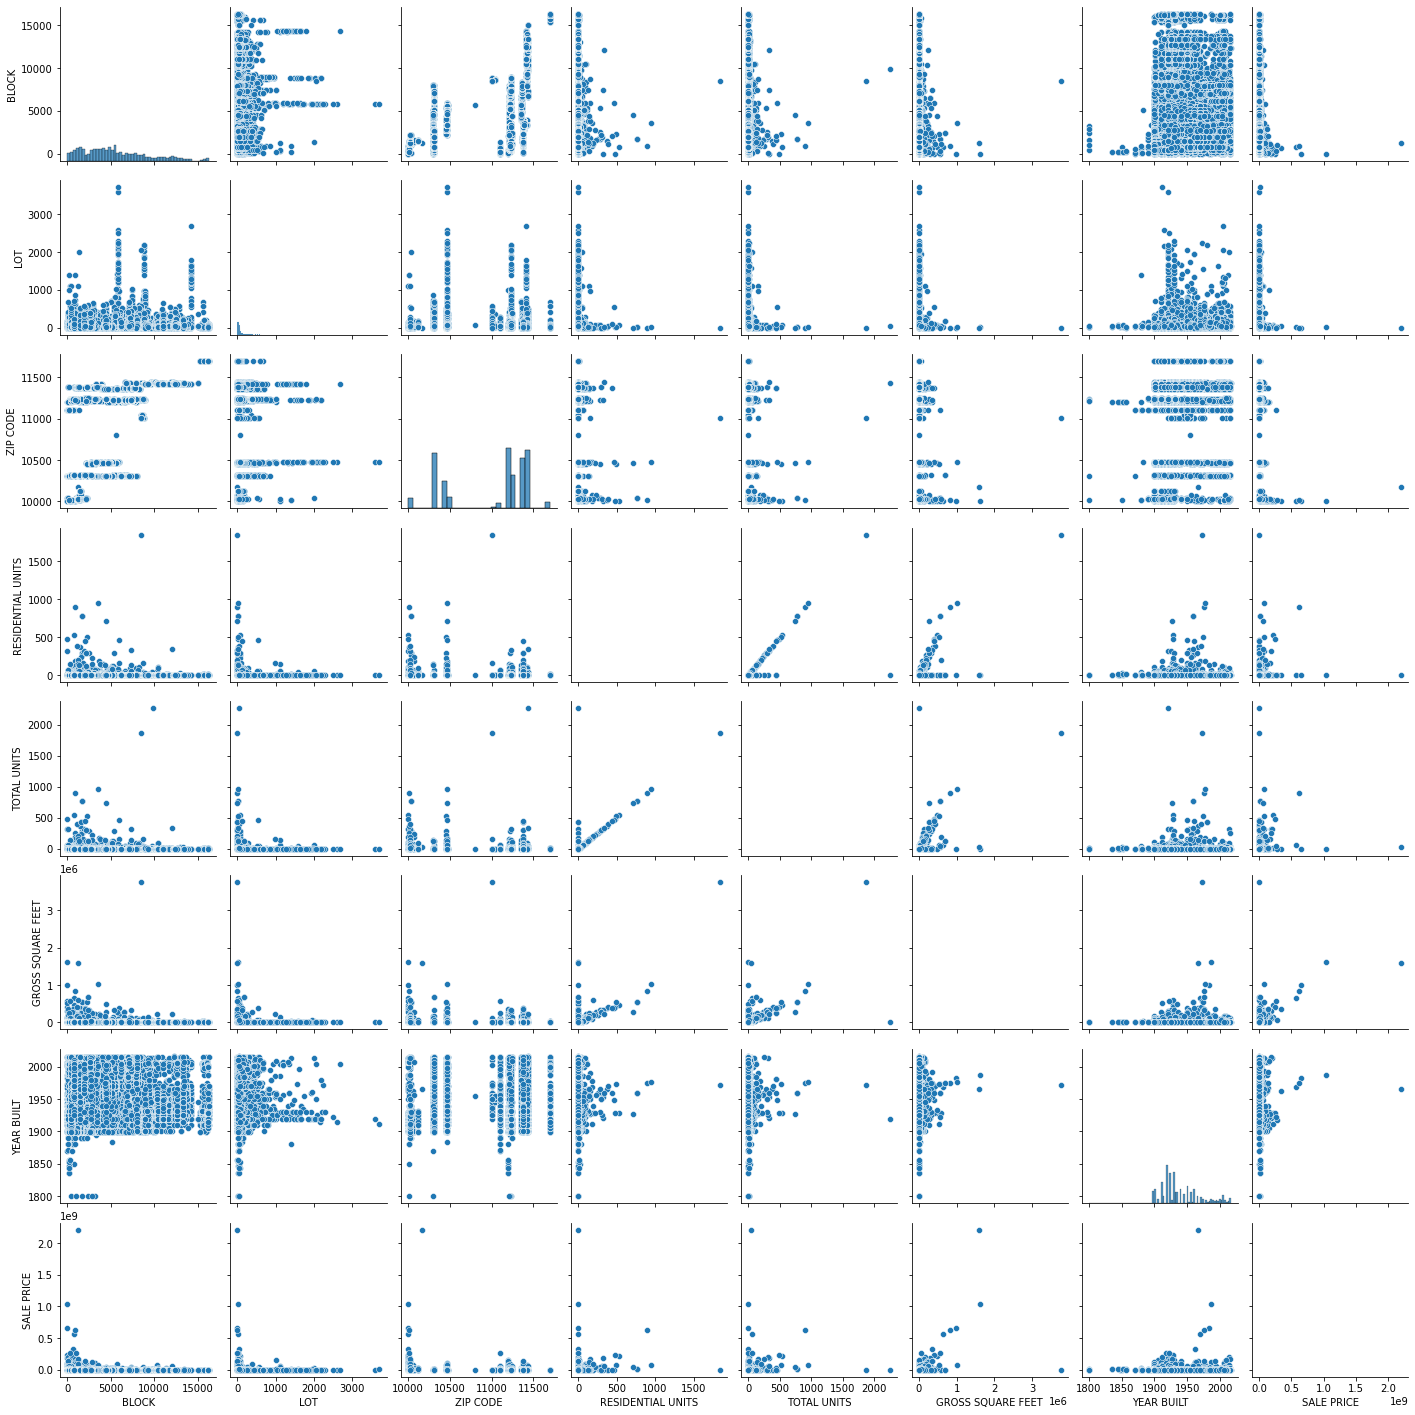

In [52]:
sns.pairplot(dfReal)

In [53]:
dfReal = dfReal[dfReal["SALE PRICE"] < 500000000]
dfReal = dfReal[dfReal["GROSS SQUARE FEET"] < 1021752]
dfReal = dfReal[dfReal["TOTAL UNITS"] < 1500]
dfReal = dfReal[dfReal["RESIDENTIAL UNITS"] < 1500]

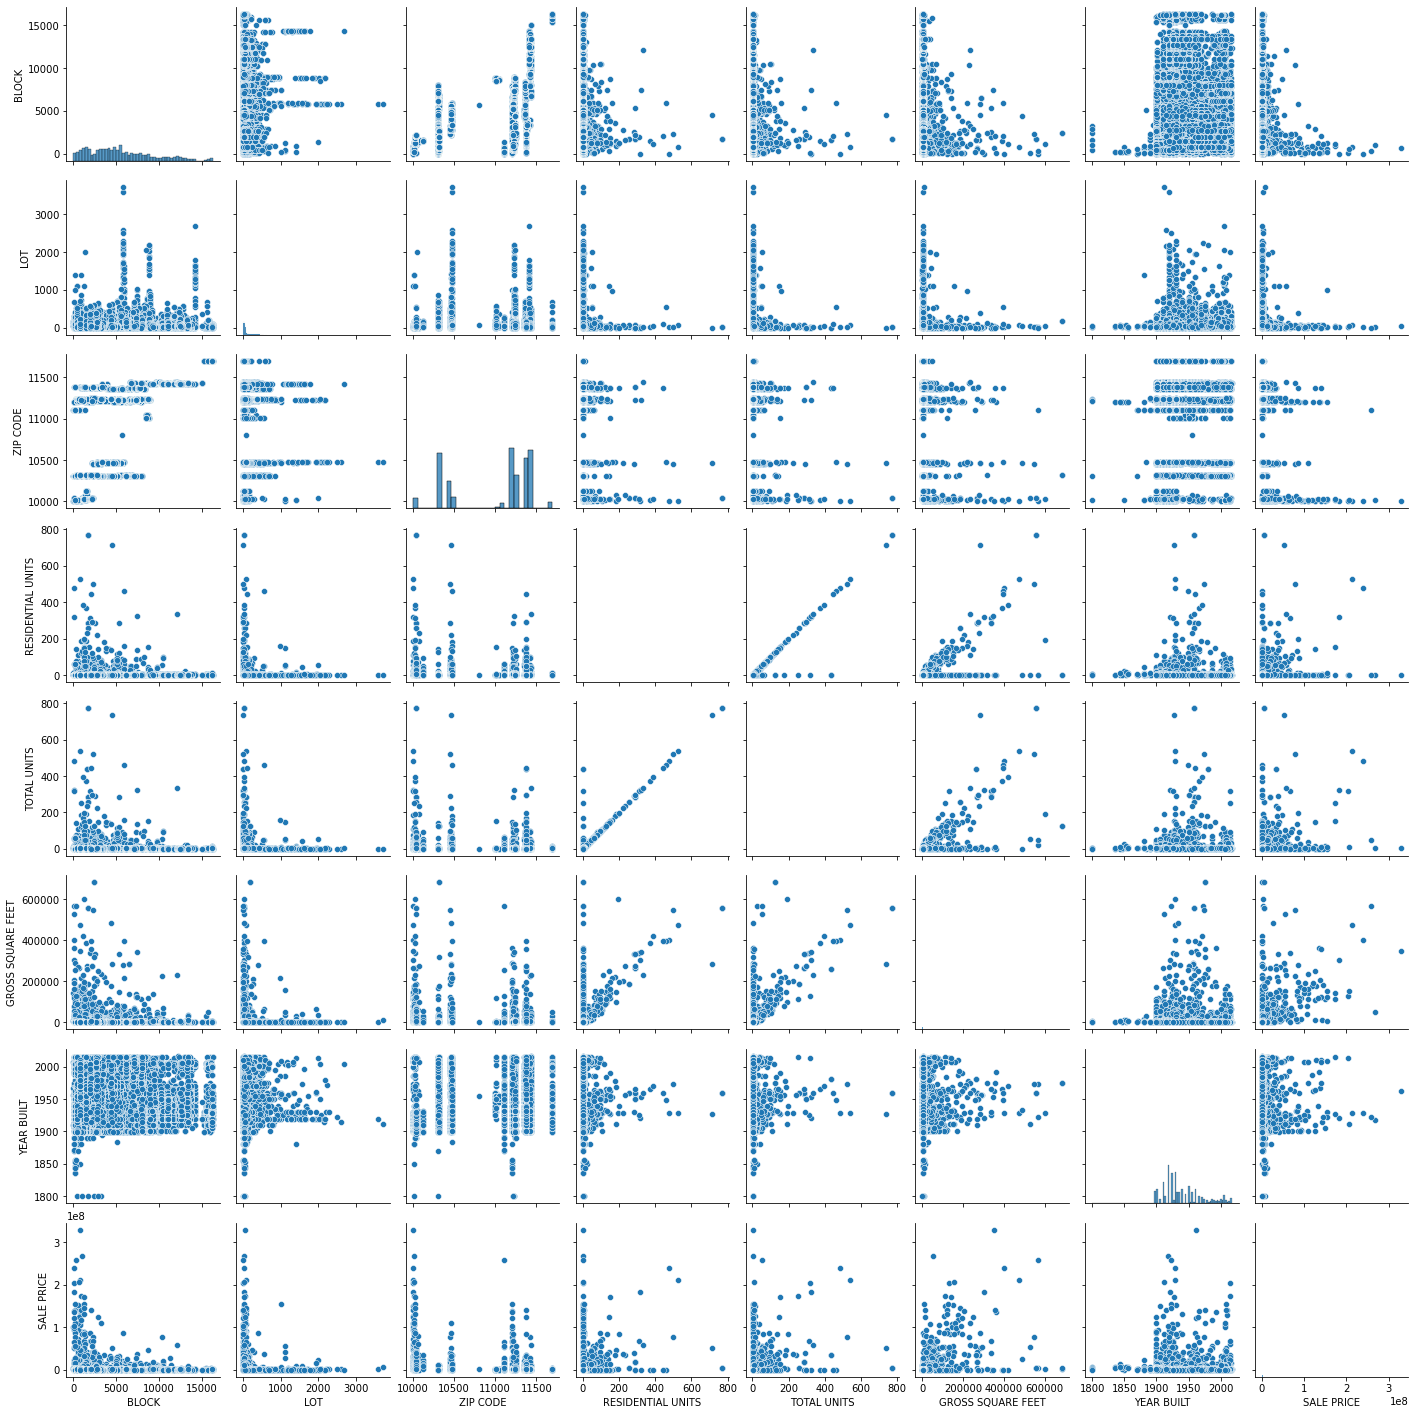

In [54]:
sns.pairplot(dfReal)

C:\Users\kmaun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BOROUGH', ylabel='count'>

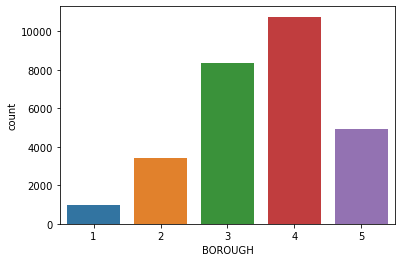

In [55]:
sns.countplot(dfReal["BOROUGH"])

<AxesSubplot:xlabel='BUILDING CLASS AT TIME OF SALE', ylabel='count'>

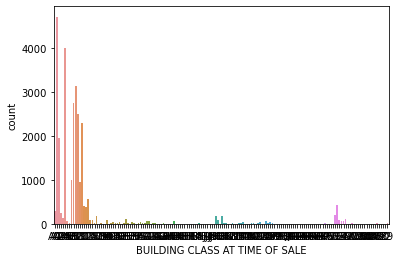

In [56]:
sns.countplot(dfReal["BUILDING CLASS AT TIME OF SALE"])

<h3>Removing Columns</h3>
<p>Removing columns that have no impact, as well as removing columns that may measure the same thing.</p>

In [57]:
dfReal = dfReal.drop(columns = {"TAX CLASS AT TIME OF SALE"})
dfReal = dfReal.drop(columns = {"BUILDING CLASS AT TIME OF SALE"})

In [58]:
corr = dfReal.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BLOCK,1.00,0.04,0.51,-0.07,-0.08,-0.10,0.06,-0.13
LOT,0.04,1.00,-0.09,-0.01,-0.01,-0.00,0.11,-0.01
ZIP CODE,0.51,-0.09,1.00,-0.08,-0.08,-0.11,-0.24,-0.11
RESIDENTIAL UNITS,-0.07,-0.01,-0.08,1.00,0.95,0.66,-0.01,0.26
TOTAL UNITS,-0.08,-0.01,-0.08,0.95,1.00,0.70,-0.01,0.31
GROSS SQUARE FEET,-0.10,-0.00,-0.11,0.66,0.70,1.00,0.04,0.50
YEAR BUILT,0.06,0.11,-0.24,-0.01,-0.01,0.04,1.00,-0.02
SALE PRICE,-0.13,-0.01,-0.11,0.26,0.31,0.50,-0.02,1.00


In [59]:
dfReal_tmp = pd.get_dummies(dfReal, drop_first=True)
dfReal_tmp.head()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,BOROUGH_2,BOROUGH_3,BOROUGH_4,BOROUGH_5
0,392,6,10009,5,5,6440,1900,6625000,0,0,0,0
1,402,21,10009,10,10,6794,1913,3936272,0,0,0,0
2,404,55,10009,6,6,4615,1900,8000000,0,0,0,0
3,406,32,10009,8,8,4226,1920,3192840,0,0,0,0
4,387,153,10009,24,24,18523,1920,16232000,0,0,0,0


<h2>Data Setup</h2>

In [60]:
y = np.array(dfReal_tmp["SALE PRICE"]).reshape(-1,1)
dfReal_ = dfReal_tmp.drop(columns={"SALE PRICE"})

In [61]:
X2 = sm.add_constant(dfReal_)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     1170.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        21:20:42   Log-Likelihood:            -4.8247e+05
No. Observations:               28393   AIC:                         9.650e+05
Df Residuals:                   28381   BIC:                         9.651e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.97e+07   6.93e+0

<h3>Removing Columns</h3>

In [62]:
dfReal_tmp = dfReal_tmp.drop(columns={"LOT"})
dfReal_tmp= dfReal_tmp.drop(columns={"ZIP CODE"})
dfReal_tmp = dfReal_tmp.drop(columns={"YEAR BUILT"})
dfReal_tmp = dfReal_tmp.drop(columns={"SALE PRICE"})
dfReal_ = dfReal_tmp

In [63]:
x = dfReal_

In [64]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=.3)
print("X-Train:", xTrain.shape)
print("X-Test:", xTest.shape)
print("Y-Train:", yTrain.shape)
print("Y-Test:", yTest.shape)

X-Train: (19875, 8)
X-Test: (8518, 8)
Y-Train: (19875, 1)
Y-Test: (8518, 1)


In [65]:
modelReal = LinearRegression()
modelReal.fit(xTrain,yTrain)

LinearRegression()

In [66]:
X2 = sm.add_constant(xTrain)
est = sm.OLS(yTrain,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     1120.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        21:20:42   Log-Likelihood:            -3.3920e+05
No. Observations:               19875   AIC:                         6.784e+05
Df Residuals:                   19866   BIC:                         6.785e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.015e+07   2.56e+0

In [67]:
ypred = modelReal.predict(xTest)
mean_squared_error(ypred,yTest,squared=False)

4660826.254286697

In [68]:
tmp1 = pd.DataFrame(yTest, columns={"Y values"})
tmp2 = pd.DataFrame(ypred, columns={"Predictions"})
tmp3 = pd.DataFrame((yTest-ypred), columns={"Residual"})
resFrame = pd.concat([tmp1,tmp2,tmp3], axis=1)
resFrame.sort_values("Residual").head()

,Y values,Predictions,Residual
5033,33663600,1.403050e+08,-1.066414e+08
3515,5020000,6.940687e+07,-6.438687e+07
2386,54052917,1.063317e+08,-5.227875e+07
1185,224020,4.836917e+07,-4.814515e+07
407,5004641,5.223330e+07,-4.722866e+07


<h1>Logistic Regression</h1>

<h2>Analyzing and Cleaning</h2>

In [69]:
dfCred.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [70]:
dfCred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [71]:
dfCred["loan_status"].mean()

0.21816396059052823

<h3>Changing Data Types</h3>
<p>Changing data types to category if necessary</p>

In [72]:
dfCred['loan_intent']=dfCred['loan_intent'].astype('category')
dfCred['cb_person_default_on_file']=dfCred['cb_person_default_on_file'].astype('category')
dfCred['loan_grade']=dfCred['loan_grade'].astype('category')
dfCred['person_home_ownership']=dfCred['person_home_ownership'].astype('category')
dfCred['loan_status']=dfCred['loan_status'].astype('category')

In [73]:
dfCred.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


<AxesSubplot:xlabel='loan_intent', ylabel='count'>

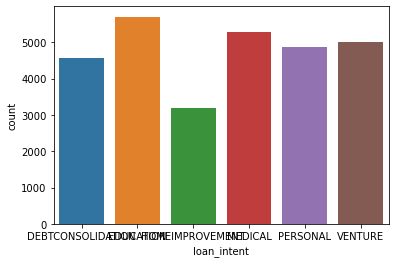

In [94]:
sns.countplot(data = dfCred, x = 'loan_intent')

<AxesSubplot:xlabel='cb_person_default_on_file', ylabel='count'>

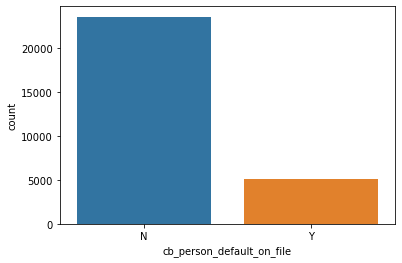

In [95]:
sns.countplot(data = dfCred, x = 'cb_person_default_on_file')

<AxesSubplot:xlabel='loan_grade', ylabel='count'>

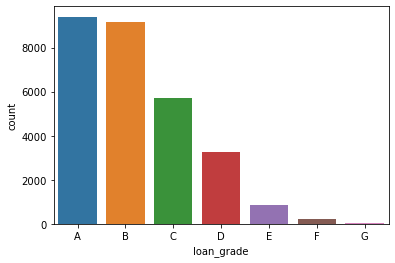

In [96]:
sns.countplot(data = dfCred, x = 'loan_grade')

<AxesSubplot:xlabel='person_home_ownership', ylabel='count'>

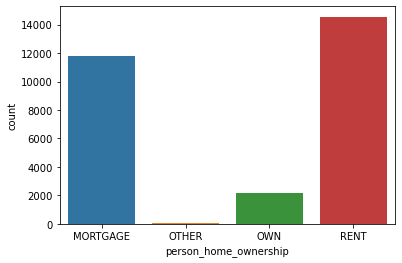

In [97]:
sns.countplot(data = dfCred, x = 'person_home_ownership')

<AxesSubplot:xlabel='loan_status', ylabel='count'>

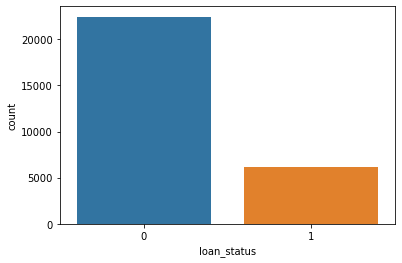

In [98]:
sns.countplot(data = dfCred, x = 'loan_status')

<h3>Removing Null Values</h3>

In [74]:
dfCred.isnull().sum().sort_values()

person_age                       0
person_income                    0
person_home_ownership            0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
person_emp_length              895
loan_int_rate                 3116
dtype: int64

In [75]:
dfCred = dfCred.dropna()

<h3>Exploring and Removing Outliers</h3>

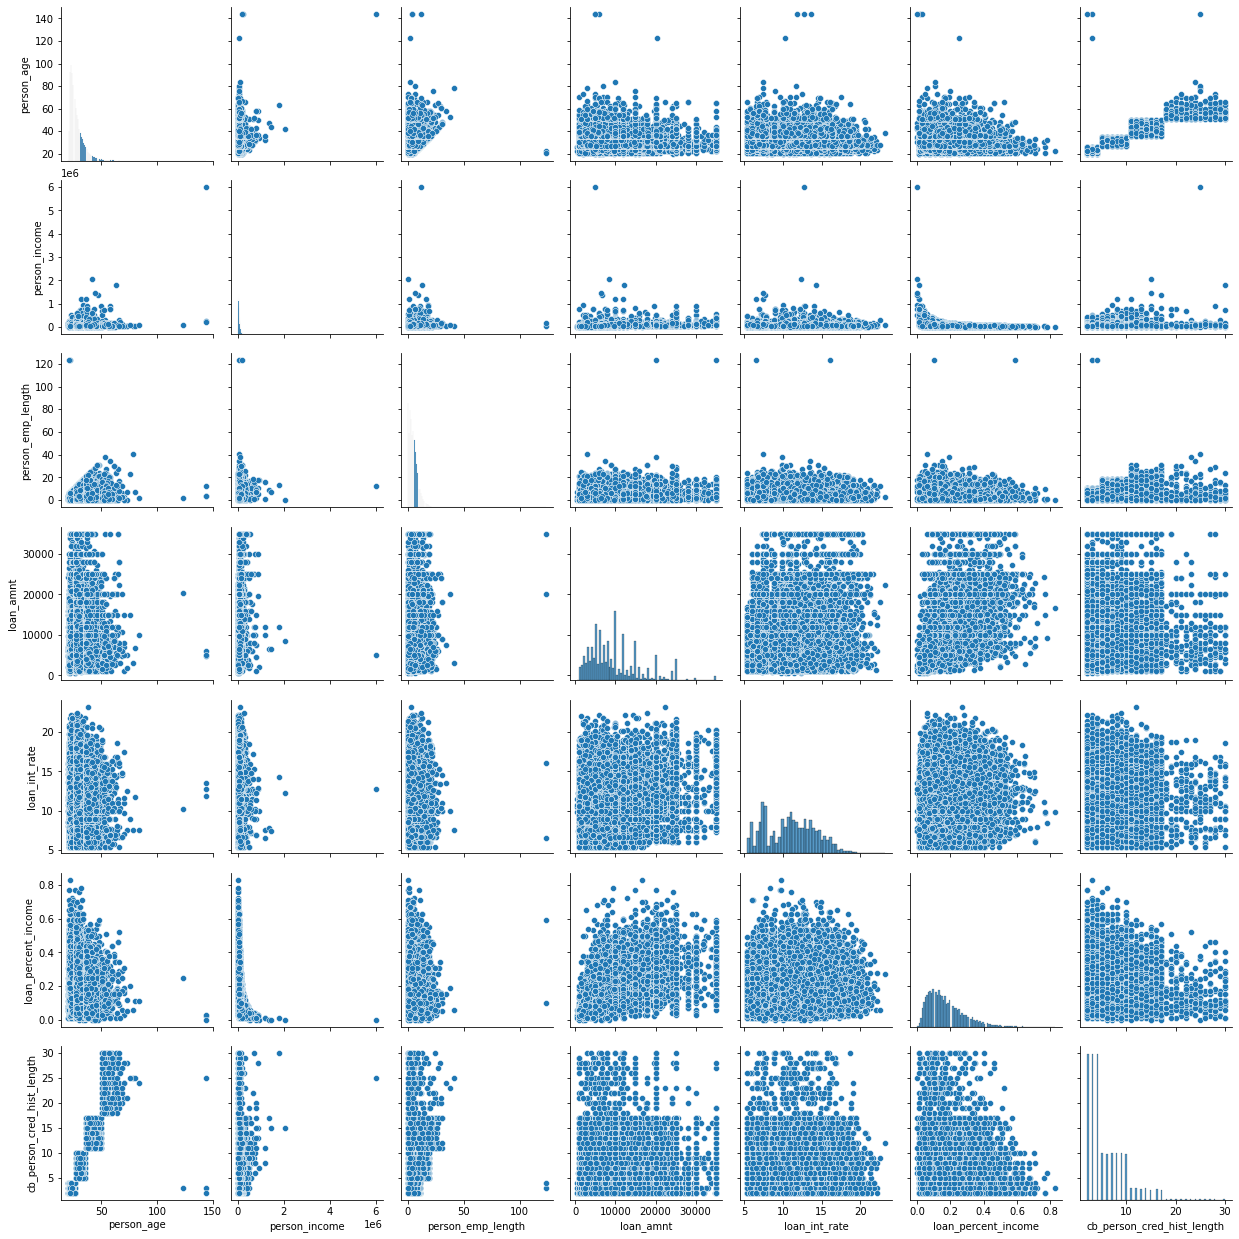

In [76]:
sns.pairplot(dfCred)

In [77]:
dfCred = dfCred[dfCred["person_emp_length"] < 100]
dfCred = dfCred[dfCred["person_age"] < 100]
dfCred = dfCred[dfCred["person_income"] < 6000000]

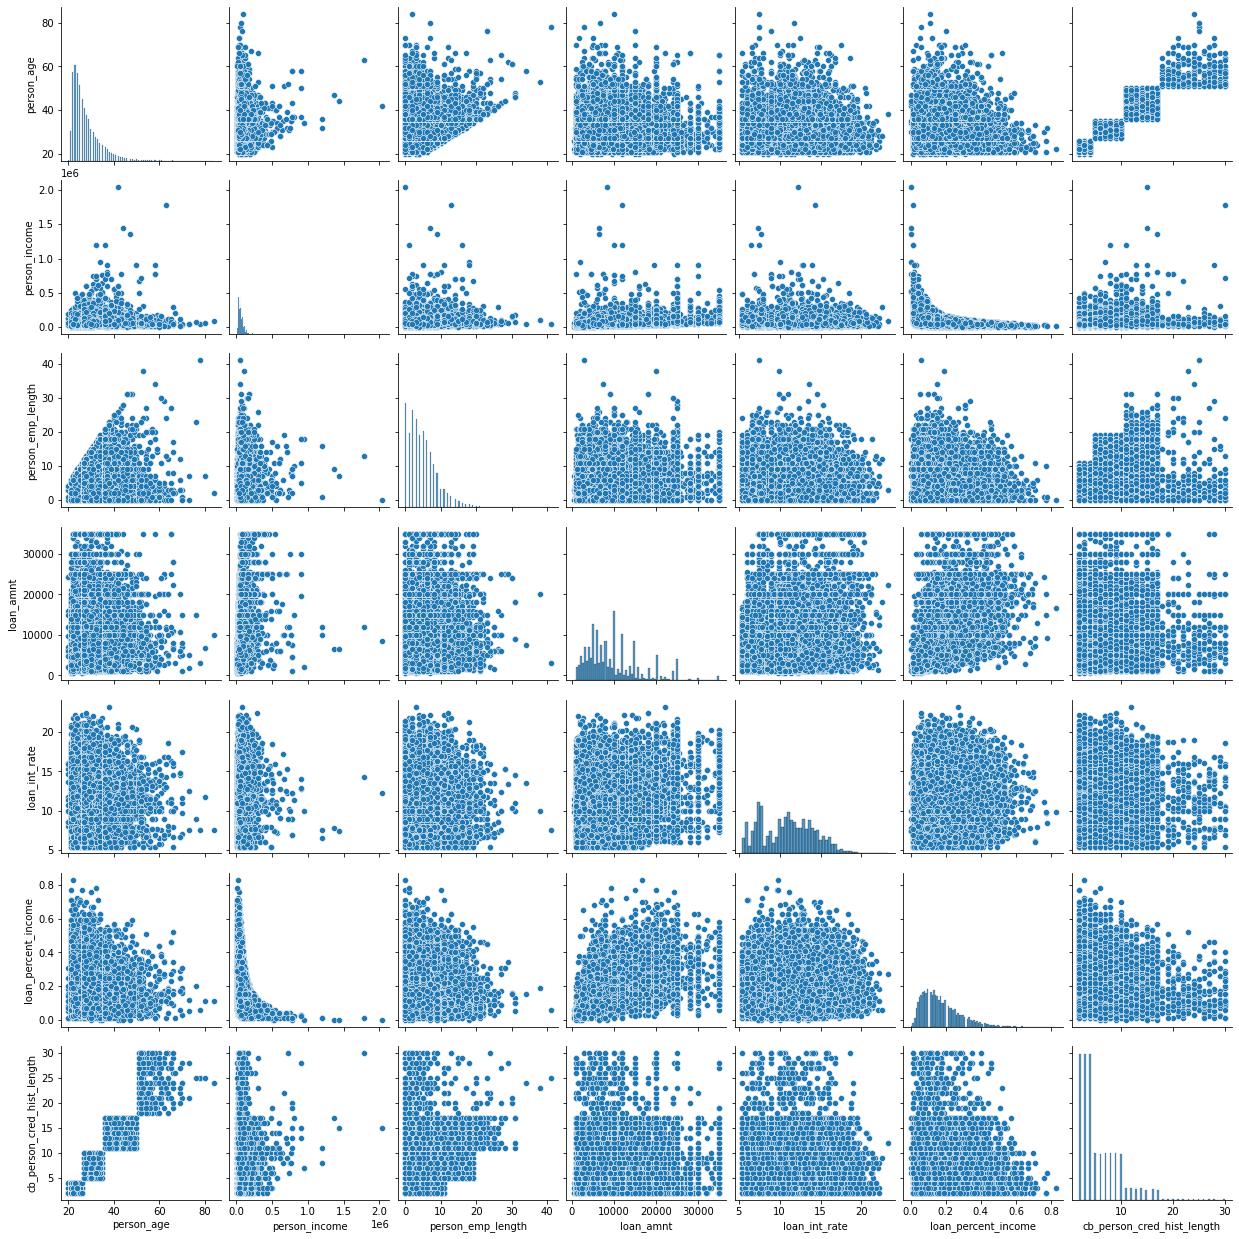

In [78]:
sns.pairplot(dfCred)

<h2>Data Prep</h2>

<h3>Model 1</h3>

In [79]:
dfCred_tmp = pd.get_dummies(dfCred, drop_first=True)
dfCred_tmp.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,loan_status_1,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0.10,2,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,0.57,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,0.53,2,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,0.55,4,0,0,1,...,0,0,0,1,0,0,0,0,1,1
5,21,9900,2.0,2500,7.14,0.25,2,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [83]:
test1, train1 = train_test_split(dfCred_tmp,test_size=0.3)

In [85]:
form = "loan_status_1 ~ person_age + person_income + person_emp_length + loan_amnt + loan_int_rate + loan_percent_income + cb_person_cred_hist_length + person_home_ownership_OTHER + person_home_ownership_OWN + person_home_ownership_RENT + loan_intent_PERSONAL + loan_intent_VENTURE + loan_grade_B + loan_grade_C + loan_grade_D + loan_grade_E + loan_grade_F + loan_grade_G + cb_person_default_on_file_Y"
model1 = sm2.logit(data=train1, formula=form).fit()
preds1 = model1.predict(test1)
model1.summary()

Optimization terminated successfully.
         Current function value: 0.338464
         Iterations 18


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          loan_status_1   No. Observations:                 8590
Model:                          Logit   Df Residuals:                     8570
Method:                           MLE   Df Model:                           19
Date:                Fri, 03 Dec 2021   Pseudo R-squ.:                  0.3546
Time:                        21:22:32   Log-Likelihood:                -2907.4
converged:                       True   LL-Null:                       -4504.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -4.9676      0.365    -13.592      0.000      -5.684      -4.251
person_age                      0.0076      0.011      0.671      0.503      -0.015       0.030
person_income                2.045e-06   7.75e-07      2.640      0.008    5.27e-07    3.56e-06
person_emp_length              -0.0037      0.009     -0.407      0.684      -0.022       0.014
loan_amnt                      -0.0001   8.44e-06    -14.053      0.000      -0.000      -0.000
loan_int_rate                   0.0794      0.033      2.405      0.016       0.015       0.144
loan_percent_income            14.2004      0.493     28.798      0.000      13.234      15.167
cb_person_cred_hist_length     -0.0150      0.017     -0.861      0.389      -0.049       0.019
person_home_ownership_OTHER     0.5456      0.527      1.035      0.300      -0.487       1.578
person_home_ownership_OWN      -1.5743      0.196     -8.048      0.000      -1.958      -1.191
person_home_ownership_RENT      0.8589      0.078     11.028      0.000       0.706       1.012
loan_intent_PERSONAL           -0.3539      0.092     -3.842      0.000      -0.534      -0.173
loan_intent_VENTURE            -0.7413      0.100     -7.379      0.000      -0.938      -0.544
loan_grade_B                    0.2171      0.151      1.438      0.150      -0.079       0.513
loan_grade_C                    0.3842      0.227      1.689      0.091      -0.062       0.830
loan_grade_D                    2.3978      0.286      8.377      0.000       1.837       2.959
loan_grade_E                    2.3543      0.357      6.587      0.000       1.654       3.055
loan_grade_F                    3.1477      0.486      6.482      0.000       2.196       4.099
loan_grade_G                   38.2865   1.63e+07   2.35e-06      1.000   -3.19e+07    3.19e+07
cb_person_default_on_file_Y     0.0037      0.096      0.039      0.969      -0.183       0.191
===============================================================================================
"""

<h3>Removing Columns</h3>
<p>Removing columns that have no impact on the loan status</p> 
</p>The following are removed as they have very low counts as shown in the count plot above.</p>
<ul>
<li>person_home_ownership_OTHER
<li>loan_grade_G
<li>loan_grade_F
</ul>

In [86]:
dfCred_tmp2 = dfCred_tmp.drop(columns={"person_age", "person_emp_length", "cb_person_cred_hist_length", "person_home_ownership_OTHER", "cb_person_default_on_file_Y", "loan_grade_F	", "loan_grade_G"}) 

<h3>Model 2</h3>

In [102]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [140]:
#sampler = RandomOverSampler()
#sampler = RandomUnderSampler()
#sampler = TomekLinks(sampling_strategy='not majority')
#sampler = SMOTE()
#sampler = ADASYN()
sampler = SVMSMOTE()

In [125]:
dfY = dfCred_tmp2["loan_status_1"]
dfX = dfCred_tmp2.drop(columns={"loan_status_1"})

xC = np.array(dfX)
yC = np.array(dfY).reshape(-1,1)

In [126]:
X_trainC, X_testC, y_trainC, y_testC = train_test_split(xC, yC, test_size=0.3)

In [141]:
X_trainCSamp, y_trainCSamp = sampler.fit_resample(X_trainC, y_trainC)

<h3>Scaling and Sampling</h3>

In [142]:
scaler = MinMaxScaler()
X_trainC_ = scaler.fit_transform(X_trainCSamp)
X_testC_ = scaler.transform(X_testC)

In [143]:
model_Cred = LogisticRegression(max_iter=1000).fit(X_trainC_,y_trainCSamp.ravel())

In [144]:
cred = model_Cred.predict(X_testC_,)

<AxesSubplot:>

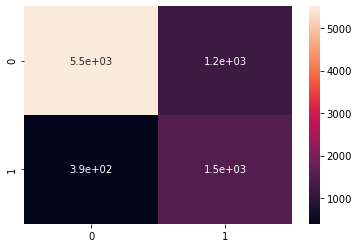

In [145]:
labelsC = convert_prob_to_label(np.array(cred))
conf_matrixP = confusion_matrix(y_testC,labelsC)
sns.heatmap(conf_matrixP, annot=True)

In [146]:
print("F1:",f1_score(y_testC, labelsC))
print("Acc:",accuracy_score(y_testC, labelsC))
print("Recall:",recall_score(y_testC, labelsC))
print("Precision:",precision_score(y_testC, labelsC))

F1: 0.6529540481400438
Acc: 0.8153667054714785
Recall: 0.7919320594479831
Precision: 0.5554728220402085


<h2>Part 4</h2>

<p>I would not use either model I made. The first one did a very poor job of estimating sale price. The RMSE was around 6 million. I feel I did not have enough knowledge New York realestate to remove outliers. I just googled the average apartment price, which gave me around 4-5k which I used for sale price outliers.</p>
<p>For the second one, the accuracy isn't much higher than the base-line accuracy. So I don't believe it would work well either. I missed many true positives and gave a lot of false positives.</p>